# Independet Variable Transformation

## Welcome to *Signals and Systems*: Understanding Transformations of Independent Variables
Welcome to your first hands-on experience with Signals and Systems in a Jupyter Notebook!
In this assignment, you will explore how transformations of the independent variable affect a signal.
We are going to do the implementation and visualize signal manipulation using `matplotlib`.

#### What You Need to Know

You may already be familiar with the fundamental idea behind this topic from high school mathematics. Specifically, if you have studied the section `انتقال تابع` in the `حسابان` course, then this should be a smooth transition for you. However, instead of just theoretical study, we will take a computational approach, where you will write and execute Python code to manipulate signals and observe their behavior.

The parts that are required for you to solve are marked as `#TODO`, so simply implement those and make sure to run those cells.

---


Before we dive into signal transformations, always ensure that you have imported the necessary libraries. Run the following code first:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Now, let's define our base signal 𝑓(𝑡) as follows:
$$
f(t) =
\begin{cases} 
t + 1, & -1 \leq t < 0, \\
1, & 0 \leq t \leq 2, \\
0, & \text{otherwise}
\end{cases}
$$
The following Python function implements this piecewise linear signal.

In [1]:
def base_signal(t):
    #TODO
    pass

Now let's plot that function using the `matplotlib` library:

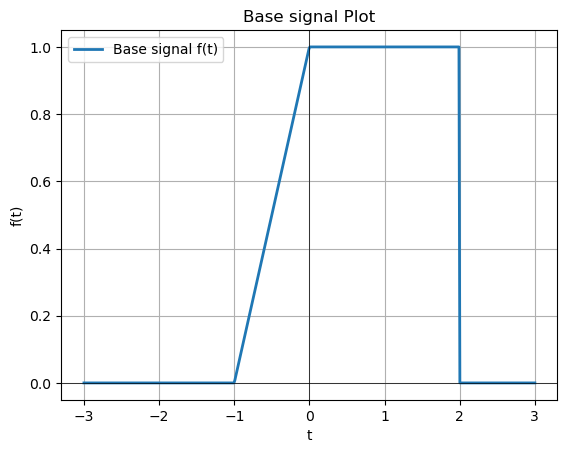

In [8]:
# Generate t values
t_values = np.linspace(-3, 3, 500)
f_values = np.array([base_signal(t) for t in t_values])

# Plot the function
plt.plot(t_values, f_values, label="Base signal f(t)", linewidth=2)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Base signal Plot")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

### Note: Understanding `np.linspace()` in Plotting
One important aspect of plotting that’s worth mentioning is the following line of code:
```python
t_values = np.linspace(-3, 3, 500)
```
This line generates a sequence of values for the independent variable 𝑡. Let's break it down:
```python
np.linspace(start, stop, num)
```
And here is its explanation:
- start = -2 → This is the starting value of t. The first value in the generated array will be -2.
- stop = 3 → This is the ending value of t. The last value in the generated array will be 3.
- num = 500 → This is the number of points to generate between -2 and 3.

Try changing its parameters to see how it behaves accordingly. (optional)

To make our plot clearer and more readable, we can restrict the vertical axis (the range of 𝑓(𝑡) values) using:
```python
plt.ylim(f_min, f_max)
```
Check below:

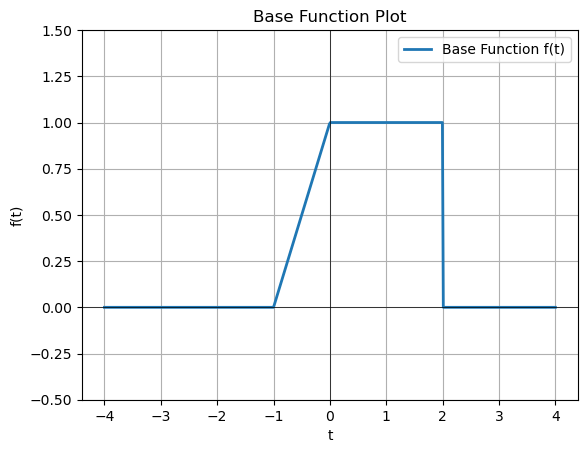

In [12]:
t_values = np.linspace(-4, 4, 500)
f_values = np.array([base_signal(t) for t in t_values])

# Restrict the range of f_values
f_min, f_max = -0.5, 1.5  # Define your desired f range
f_values[(f_values < f_min) | (f_values > f_max)] = np.nan  # Set out-of-range values to NaN

# Plot the function
plt.plot(t_values, f_values, label="Base Function f(t)", linewidth=2)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Base Function Plot")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(f_min, f_max)
plt.legend()
plt.show()

---

#### Before heading to the signal transformation...
Before diving into signal transformations, let's define a function for plotting. This will make the plotting process easier, cleaner, and more modular.

Read the explanation carefully, especially regarding the function parameters, so that you can use it correctly without confusion later.
check below:

In [15]:
def plot_signals(signals, f_min=-0.5, f_max=1.5, title="Signal Plot", figsize=(8, 5), x_step=0.5):
    """
    Plots multiple signals on the same figure.

    Parameters:
    - signals: list of tuples [(t_values1, f_values1, label1, style1, color1), (t_values2, f_values2, ...)]
    - f_min: float, lower limit for f-values.
    - f_max: float, upper limit for f-values.
    - title: str, title of the plot.
    - figsize: tuple, figure size (width, height).
    - x_step: float, step size for x-axis ticks.
    """
    plt.figure(figsize=figsize)

    for t_values, f_values, label, style, color in signals:
        # Restrict the range of f_values
        f_values = np.where((f_values < f_min) | (f_values > f_max), np.nan, f_values)

        # Plot the function
        plt.plot(t_values, f_values, label=label, linestyle=style, linewidth=2, color=color)

    # Labels and grid
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.title(title)
    plt.grid(True)

    # Draw axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Set x-axis ticks at intervals of at least 0.5
    x_min, x_max = min(signals[0][0]), max(signals[0][0])  # Get range from the first signal
    plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max) + x_step, step=x_step))

    # Set y-axis limits
    plt.ylim(f_min, f_max)

    # Add legend and show
    plt.legend()
    plt.show()

And this is a simple usage of that ploting:

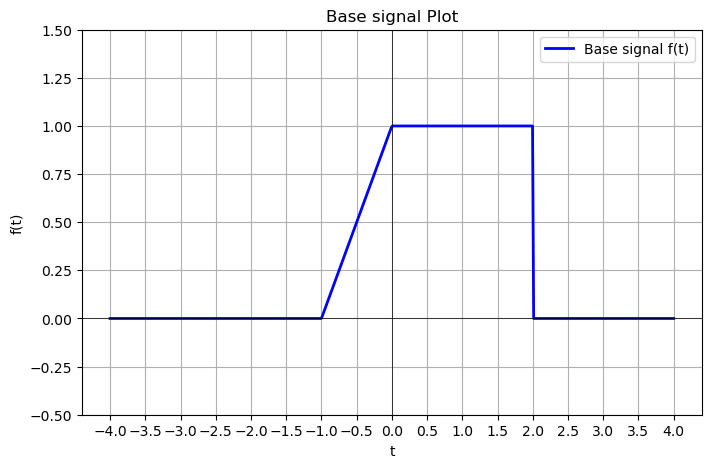

In [27]:
# Generate time values
t_values = np.linspace(-4, 4, 500)

# Compute function values
f_values = np.array([base_signal(t) for t in t_values])

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Base signal f(t)", "solid", "blue")  # (t, f, label, style, color)
]

# Call the function to plot
plot_signals(signals, title="Base signal Plot")


Okay, now let's head to the transformation!

**Key Concept**: The transformation functions will return new functions, not computed values.

Now, let’s implement time shifting, time scaling, and combined transformations using this approach!

---

## Time Shift
As we have learned, time shift is defined as follows:
$$
f(t) \rightarrow f(t-t_0)
$$
Now, we apply that time shift by implementing the `time_shifter` function below:

In [3]:
def time_shifter(f, t0):
    """
    Returns a function that shifts f(t) by t0.

    Parameters:
    - f: A function representing the original signal.
    - t0: The shift amount (positive → right shift, negative → left shift).

    Returns:
    - A new function that takes t and returns f(t - t0).
    """
    #TODO
    pass

Now, let's plot that to see the changes...

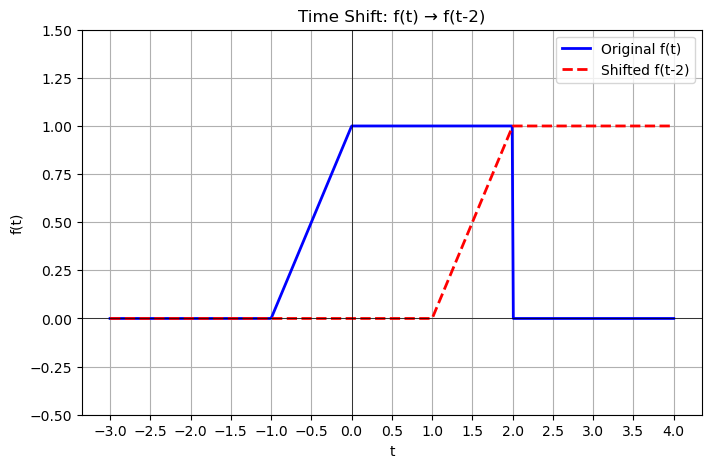

In [46]:
# Generate time values
t_values = np.linspace(-3, 4, 500)

# Compute original function values
f_values = ... #TODO

# Shift amount
t0 = 2

# Create the shifted function
shifted_f = ... #TODO

# Compute shifted function values by calling shifted_f for each t in t_values
shifted_f_values = ... #TODO

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, shifted_f_values, f"Shifted f(t-{t0})", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, title=f"Time Shift: f(t) → f(t-{t0})")


You may also change the $t_0$ value to check for any other shifts.

---

## Time Reverse
Now, just like before, we define a time reverser function that implements this:
$$
f(t) \rightarrow f(-t)
$$

In [49]:
def time_reverser(f):
    """
    Returns a function that reverses f(t) to f(-t).
    
    Parameters:
    - f: A function representing the original signal.

    Returns:
    - A new function that takes t and returns f(-t).
    """
    #TODO
    pass

Now, let's plot that to see the changes...

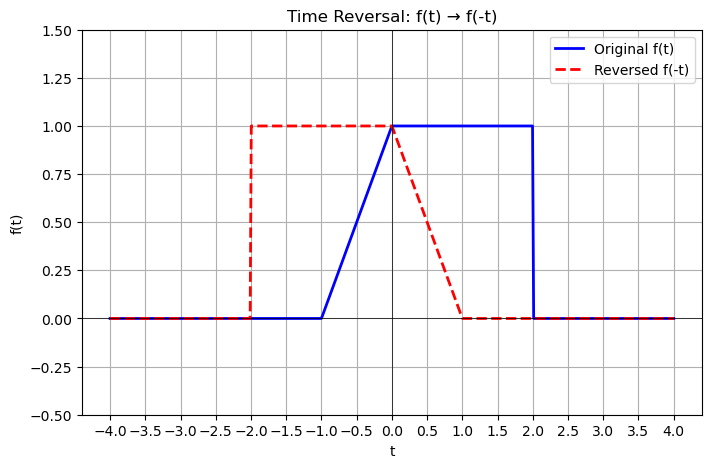

In [56]:
# Generate time values
t_values = np.linspace(-4, 4, 500)

# Compute original function values
f_values = ... #TODO

# Create the reversed function
reversed_f = ... #TODO

# Compute reversed function values
reversed_f_values = ... #TODO

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, reversed_f_values, "Reversed f(-t)", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, f_min=-0.5, f_max=1.5, title="Time Reversal: f(t) → f(-t)")


---

## Time Scaling
This must be a little bit more complicated:
$$
f(t) \rightarrow f(at)
$$
As This means every occurrence of $t$ in $f(t)$ is replaced with $at$. the effect of scaling factor $a$ is:

- 
$
\text{If } |a| > 1, \text{ the function compresses (shrinks in time).}
$

- 
$
\text{If } 0 < |a| < 1, \text{ the function stretches (expands in time).}
$

- 
$
\text{If } a < 0, \text{ the function is also time-reversed in addition to scaling.}
$

Yet the implementation is just like what we explored befor. We define a time_scaler function:

In [5]:
def time_scaler(f, a):
    """
    Returns a function that scales f(t) by factor 'a'.

    Parameters:
    - f: A function representing the original signal.
    - a: Scaling factor (|a| > 1 → compression, 0 < |a| < 1 → expansion, a < 0 → time reflection).

    Returns:
    - A new function that takes t and returns f(t / a).
    """
    #TODO
    pass

Now, let's plot that to see the changes...

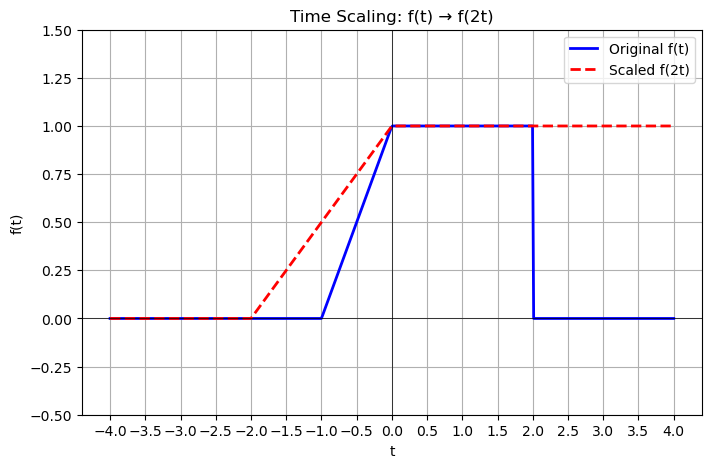

In [76]:
# Generate time values
t_values = np.linspace(-4, 4, 500)

# Compute original function values
f_values = ... #TODO

# Example scaling factor
a = 2  # Time compression (f(2t))

# Create the scaled function
scaled_f = ... #TODO

# Compute scaled function values
scaled_f_values = ... #TODO

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, scaled_f_values, f"Scaled f({a}t)", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, title=f"Time Scaling: f(t) → f({a}t)")


As before, you may also change the value of 𝑎 a to see how it affects the signal. Just make sure you change the plotting axis accordingly so as not to miss any details.

---

## The Full Transformation
Now that we have implemented the three different transformations for the continuous-time independent variable, let's see how that would work in its general case:
$$
f(t) \rightarrow f(at + t_0)
$$
To achieve this, there should be a function that prioritize the transformation, named `prioritizer`. Implement this function according to the course slides and call those three functions.

In [7]:
def prioritizer(f, a, t0):
    """
    Returns a function that applies both shifting and scaling transformations.

    Parameters:
    - f: A function representing the original signal.
    - a: Scaling factor (|a| > 1 → compression, 0 < |a| < 1 → expansion, a < 0 → time reflection).
    - t0: Shift amount.

    Returns:
    - A new function that takes t and returns f((t - t0) / a).
    """
    #TODO
    pass

Now, let's plot and make sure that it works properly.

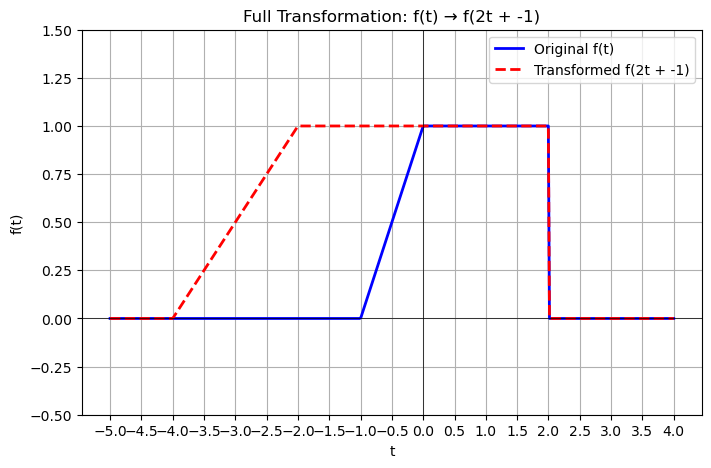

In [90]:
# Generate time values
t_values = np.linspace(-5, 4, 500)

# Compute original function values
f_values = ... #TODO

# Example transformation parameters
a = 2   # Scaling factor
t0 = -1  # Shift amount

# Create the transformed function
transformed_f = ... #TODO

# Compute transformed function values
transformed_f_values = ... #TODO

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, transformed_f_values, f"Transformed f({a}t + {t0})", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, title=f"Full Transformation: f(t) → f({a}t + {t0})")


You may also change the values of $a$ and $t_0$ to make sure you did the job right.

---